# <font color='red'> NOTA: 5.0 </font> 

__Comentarios:__

En general, es un muy buen trabajo !!!

# Parcial 2 Series de tiempo univariadas
- __Nombre y cédula del integrante 1 del grupo:__

Jhonatan Smith Garcia Muñoz
C.C 1039705595



- __Nombre y cédula del integrante 2 del grupo:__

Felipe Lopera Angel
C.C 1000416180

#punto 1


In [ ]:
import pandas as pd # Para importar las BD
import numpy as np # Para trabajar con vectores, matrices y funciones especiales
from numpy.polynomial import Polynomial as P
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
plt.style.use('fivethirtyeight') # Para dar un estilo distinto a los gráficos

In [ ]:
# La hoja bd1 contiene la base de datos de interés:
serie1 = pd.read_excel("/content/datos_parcial2.xlsx", sheet_name="serie1", parse_dates=["fecha"]) 

In [ ]:
serie1.shape # Se tienen 231 datos, para dos variables. La respectiva serie de tiempo.

(231, 2)

In [ ]:
serie1.dtypes

fecha    datetime64[ns]
valor           float64
dtype: object

In [ ]:
serie1.head()

,fecha,valor
0,2021-01-01,0.06
1,2021-01-02,0.05
2,2021-01-03,0.05
3,2021-01-04,0.51
4,2021-01-05,2.03


In [ ]:
serie1.tail()

,fecha,valor
226,2021-08-15,16.90
227,2021-08-16,17.35
228,2021-08-17,18.85
229,2021-08-18,21.40
230,2021-08-19,22.60


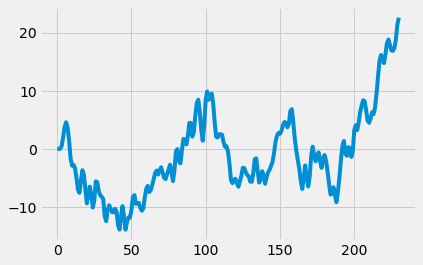

In [ ]:
serie1.valor.plot()

La grafica de la serie muestra una tendencia. Note que la serie nunca oscila alrededor de un valor. E incluso al final, toma una tendencia crecientte. 
Se espera que no sea estacionaria.

# ACF y PACF serie 1

In [ ]:
acf(serie1.valor, nlags=10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([1.        , 0.95534841, 0.89390336, 0.84964961, 0.81876524,
       0.78135809, 0.73413899, 0.68778667, 0.6483945 , 0.61305566,
       0.57519929])

In [ ]:
pacf(serie1.valor, method='ywm', nlags=10)

array([ 1.00000000e+00,  9.55348412e-01, -2.15179847e-01,  2.09818614e-01,
        4.60892561e-02, -1.04349084e-01, -5.92587331e-02,  1.69554317e-04,
        3.47740833e-03, -1.80037993e-03, -3.32295906e-02])

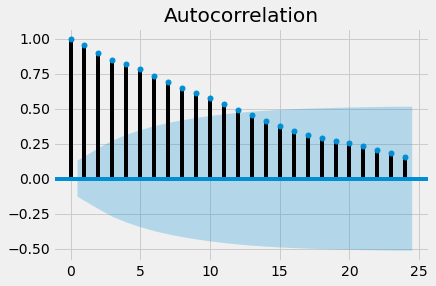

In [ ]:
plot_acf(serie1.valor)
plt.show()



Note que la ACF decae de manera "muy lenta". Esto implica que hay una tendencia. Nuevamente, esto no es sorpresa; dado el analisis de la serie original. 

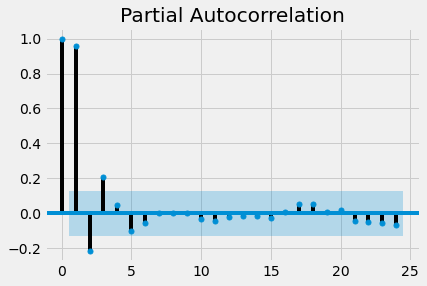

In [ ]:
plot_pacf(serie1.valor, method='ywm')
plt.show()

Note que hay corte. Ahora, como se sospecha (evidentemente) que no es estacionaria, este analisis se pospone.

Se procede a aplicar la prueba de estacionariedad de Dickey Fuller, basado en las raices unitarias. 

In [ ]:
adfuller(serie1.valor)[1]

0.8482869409753933

Tenga presente que el valor-p es grande. No se rechaza la hipotesis nula y se concluye por tanto, que la serie no es estacionaria. Por tando, se han de tomar diferencias.

In [ ]:
adfuller(serie1.valor.diff().dropna()) # Se toma diferencia, se eliminan los na y se realiza la prueba

(-6.904972776072946,
 1.2540124522200221e-09,
 2,
 227,
 {'1%': -3.4594900381360034,
  '5%': -2.8743581895178485,
  '10%': -2.573601605503697},
 612.6121479835192)

La prueba de Dickey-Fuller prueba estacionariedad. Para este caso, despues de tomar una diferencia (d=1) se concluye que el proceso ahora es estacionario. 
Se procede a graficar la nueva serie ahora, con las diferencias tomadas.

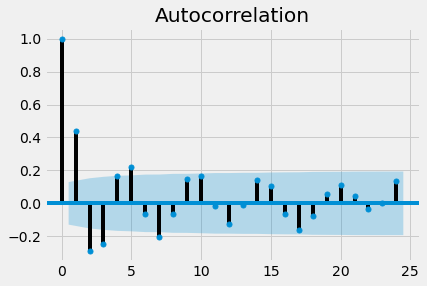

In [ ]:
plot_acf(serie1.valor.diff().dropna())
plt.show()



La ACF ahora, muestra un comportamiento mas aceptable respecto a su "Decaimiento". Se sospecha de un comportamiento senoidal. Aunque, hay quien podria verlo como corte.

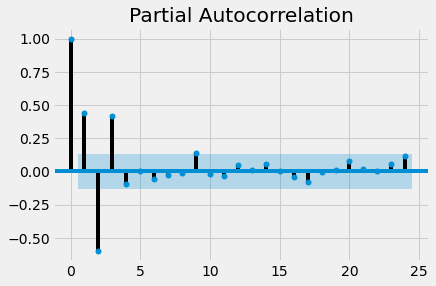

In [ ]:

plot_pacf(serie1.valor.diff().dropna(), method="ywm")
plt.show()

Para la primera serie, la PACF tiene un corte en el rezago 3 (2,3,9). Se podrian plantear varios modelos a ajustar. Muestralmente se sospecha entonces de un modelo AR con orden de los rezagos mencionados. Ahora, se plantean estos modelos y otros, que puedan ajustarse de manera adecua a la serie (No necesariamente AR)

In [ ]:
# Modelos propouestos
modelo1 = ARIMA(serie1.valor, order=(3,1,0)).fit()
modelo2 = ARIMA(serie1.valor, order=(1,1,0)).fit()
modelo3 = ARIMA(serie1.valor, order=(1,1,1)).fit()
modelo4 = ARIMA(serie1.valor, order=(2,1,0)).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


* Modelo 1: Modelo AR de orden 3
* Modelo 2: Modelo AR de orden 1
* Modelo 3: Modelo ARMA de orden 1
* Modelo 4: Modelo AR de orden 2


In [ ]:
print(modelo1.aic, modelo2.aic, modelo3.aic, modelo4.aic)
print(modelo1.bic, modelo2.bic, modelo3.bic, modelo4.bic)


657.723043181799 797.4253737933285 701.7859547986357 699.6077275167227
671.4753604174917 804.3015324111749 712.1001927254052 709.9219654434922


Lo anterior, son los AIC (primera fila) y los BIC (segunda fila) de los respectivos modelos (del 1 al 4). Para ambos criterios, se selecciona el modelo con menor valor. Basado en esto, se selecciona el modelo 1 puesto que es el que tiene menor AIC y menor BIC. Para dicho modelo, se deben de validar los supuestos. 

# Validacion de supuestos del modelo

In [ ]:
modelo1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -324.862
Date:                Wed, 05 Oct 2022   AIC                            657.723
Time:                        02:37:50   BIC                            671.475
Sample:                             0   HQIC                           663.270
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9507      0.059     16.213      0.000       0.836       1.066
ar.L2         -0.8858      0.065    -13.691      0.000      -1.013      -0.759
ar.L3          0.4167      0.060      6.920      0.000       0.299       0.535
sigma2         0.9800      0.103      9.481      0.000       0.777       1.183
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.56   Prob(JB):                         0.45
Heteroskedasticity (H):               1.21   Skew:                             0.07
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

En las pruebas de normalidad y de correlacion de los residuales, no se rechazan la hipotesis nula y se concluye que los residuales son incorrelacionados (para un rezago de orden 1) y distribuyen normal.

In [ ]:
sm.stats.acorr_ljungbox(modelo1.resid, lags=10, return_df=True) # incorrelacion para 10 rezagos


,lb_stat,lb_pvalue
1,0.339442,0.560151
2,0.911694,0.633911
3,1.057063,0.787448
4,1.302026,0.861032
5,2.016187,0.846901
6,4.308090,0.635060
7,4.822493,0.681615
8,4.949330,0.762978
9,5.082445,0.827063
10,7.828782,0.645557


Se hace un analisis de las correlaciones de los resduales para un total de 10 lags. Esto con la intencion de determinar si en efecto, son incorrelacionados, no solo de orden 1. No se tiene correlacion entre los residuales hasta el lag 10. Por tanto y siempre que se trabaje con lags <=10; los errores serán incorrelacionados, cumpliendo dicho supuesto.

In [ ]:
modelo1.summary().tables[1]




,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.9507,0.059,16.213,0.000,0.836,1.066
ar.L2,-0.8858,0.065,-13.691,0.000,-1.013,-0.759
ar.L3,0.4167,0.060,6.920,0.000,0.299,0.535
sigma2,0.9800,0.103,9.481,0.000,0.777,1.183


Note que el modelo ajustado es un AR, por tanto, es invertible por definicion. 

Falta observar que las raices del polinomio esten fuera del circulo unitario.

In [ ]:


# prueba de circulo unitario
#p = [-0.4167,0.8858,-0.9507,1]
a=np.roots([-0.4167,0.8858,-0.9507,1])
print(abs(a)) #   OEEE MARIHUANOOOO YAAAA

[1.6294354  1.21358354 1.21358354]


Tenga presente que el anterior modelo ya se probó estacionario. Las raices son >=1 por tanto, dicho modelo es estacionario

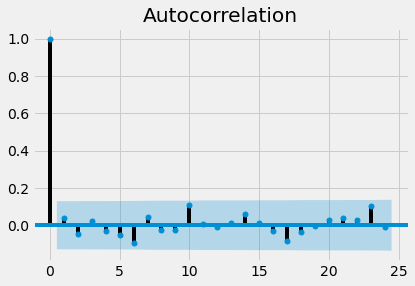

In [ ]:
plot_acf(modelo1.resid)
plt.show()

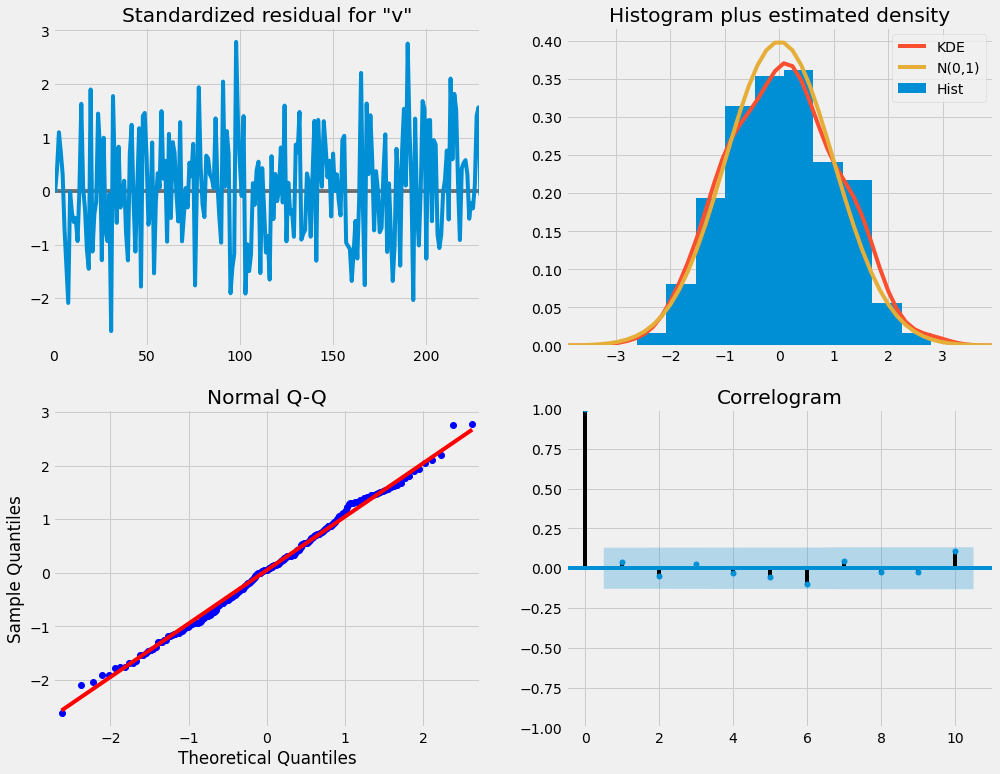

In [ ]:
modelo1.plot_diagnostics(figsize=(15,12))
plt.show()


De manera grafica y analitica, el modelo 1 cumple con todos los supuestos. Incluido el de varianza constante para los residuales.

# Prediccion con el modelo 

Se procede a realizar las predicciones con el modelo seleccionado ARIMA(3,1,0)



In [ ]:
serie1

,fecha,valor
0,2021-01-01,0.06
1,2021-01-02,0.05
2,2021-01-03,0.05
3,2021-01-04,0.51
4,2021-01-05,2.03
...,...,...
226,2021-08-15,16.90
227,2021-08-16,17.35
228,2021-08-17,18.85
229,2021-08-18,21.40


In [ ]:
pred = modelo1.get_prediction(start=231, end=235, dynamic=False) # dynamic=False evita que las predicciones futuras
                                                               # se conviertan en datos de la muestra para predicciones 
                                                               # que van más adelante.
pred_ci = pred.conf_int(alpha=0.05) # Intervalo de confianza 
pred_ci

,lower valor,upper valor
231,20.166777,24.047314
232,17.384726,25.891270
233,16.411976,27.845630
234,16.336440,29.274567
235,15.682681,29.954565


Estos son los intervalos de confianza para las respectivas predicciones. Tenga presente que las predicciones; entre mas alejadas en el timepo; mas imprecisas serán, lo que implica intervalos mas amplios y eventualmente, inservibles.

In [ ]:
pred.predicted_mean # Tabla con las predicciones


231    22.107046
232    21.637998
233    22.128803
234    22.805504
235    22.818623
Name: predicted_mean, dtype: float64

Podemos evidenciar los pronosticos puntuales, es decir, el punto medio de los intervalos de confianza anteriormente analizados. Podemos ver que oscilan el mismo valor y parecen ser similares entre si.

In [ ]:
fore = modelo1.get_forecast(5)
fore.predicted_mean



231    22.107046
232    21.637998
233    22.128803
234    22.805504
235    22.818623
Name: predicted_mean, dtype: float64

In [ ]:
fore_ci = fore.conf_int()
fore_ci # hay leves diferencias

,lower valor,upper valor
231,20.166777,24.047314
232,17.384726,25.891270
233,16.411976,27.845630
234,16.336440,29.274567
235,15.682681,29.954565


A la serie original se le deben de anexar los valores predichos. Luego se realizan las predicciones.



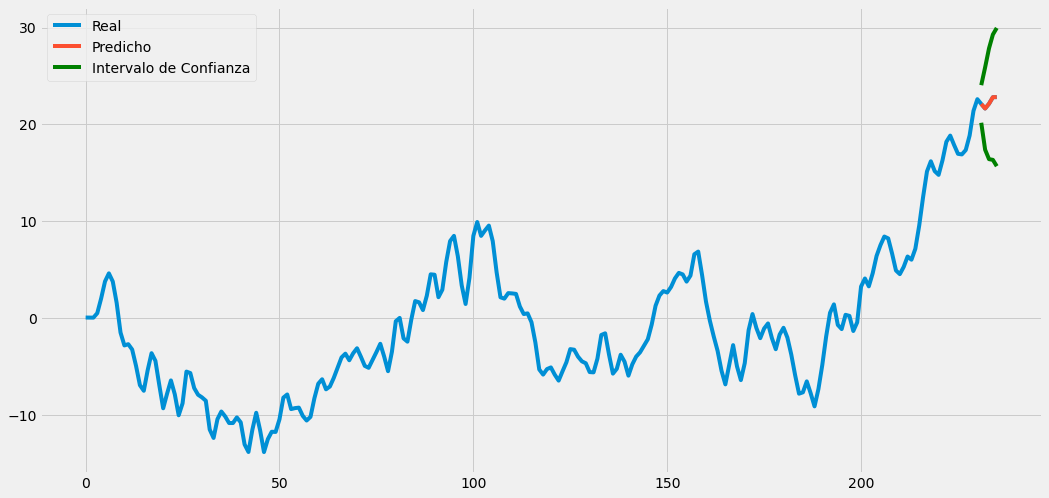

In [ ]:
plt.figure(figsize=(16,8))  #  Graficamos:
serie1.valor.append(pred.predicted_mean).plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,1].plot(color="green")
pred_ci.iloc[:,0].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])


En el anterior grafico, podemos ver, segun la serie de tiempo analizada y el modelo propuesto, la prediccion que se realiza con sus respectivos intervalos de confianza, los cuales segun la prediccion se hace mas lejana, tambien toman una amplitud mayor, se evidencia que los pronostivos puntuales tienen cierta relacion con la tendencia esperada. Notese que cada vez los intervalos de confianza toman valores más amplios. 

# punto 2
Analogo a los ejercicios anteriores, se procede a realizar el proceso para la serie de tiempo de la segunda hoja.

In [ ]:
# Lectura de la base de datos con la serie de tiempo
serie2 = pd.read_excel("/content/datos_parcial2.xlsx", sheet_name="datos2", parse_dates=["date"]) 
serie2.shape

(521, 2)

Despues de la lectura de la base de datos, se tienen 521 datos.

In [ ]:
serie2.dtypes 

date     datetime64[ns]
value           float64
dtype: object

In [ ]:
serie2.head()

,date,value
0,2020-01-01,-0.89
1,2020-01-02,-0.99
2,2020-01-03,-1.62
3,2020-01-04,-1.13
4,2020-01-05,-0.91


In [ ]:
serie2.tail()

,date,value
516,2021-05-31,-92.78
517,2021-06-01,-91.90
518,2021-06-02,-92.96
519,2021-06-03,-92.96
520,2021-06-04,-94.24


La lectura de los datos fue la adecuada. 

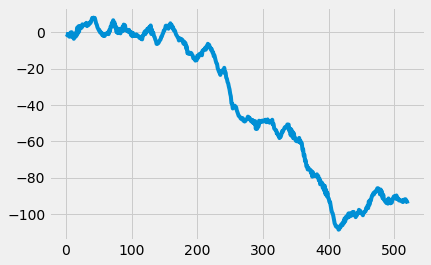

In [ ]:
serie2.value.plot()


Se evidencia la grafica de la serie de tiempo, de manera general, se nota una tendencia decreciente, se espera que el proceso no sea estacionario. Se procede a realizar las pruebas analiticas pertinentes.

In [ ]:
acf(serie2.value, nlags=10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([1.        , 0.99651655, 0.99389224, 0.99023441, 0.98719012,
       0.9833168 , 0.97999462, 0.97603285, 0.97235987, 0.96820653,
       0.96433027])

In [ ]:
pacf(serie2.value, method='ywm', nlags=10)

array([ 1.00000000e+00,  9.96516555e-01,  1.21787265e-01, -1.36745345e-01,
        5.57925121e-02, -8.89679558e-02,  3.95373334e-02, -5.37556587e-02,
       -9.78287676e-04, -3.51627384e-02,  5.60388827e-03])

# ACF y PACF serie 2

Se procede a grafica la ACF y PACF de la serie 2.

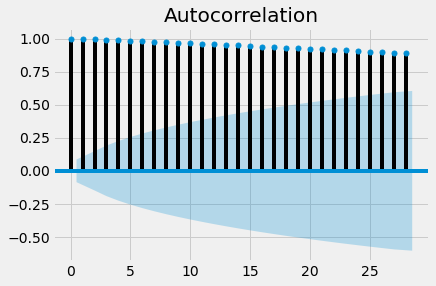

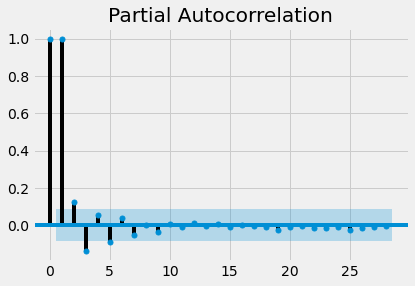

In [ ]:

plot_acf(serie2.value)
plt.show()
plot_pacf(serie2.value, method='ywm')
plt.show()

Dada la ACF que evidencia un decaimento lento, nuevamente; se apunta a una tendencia que impide seguir con los analisis. Se procede a realizar la prueba de estacionariedad.

In [ ]:
adfuller(serie2.value)[1] # Mismo p-valor. Pero aparte y más bonito.

0.9405379503085114

Tenga presente que el valor-p es grande. No se rechaza la hipotesis nula y se concluye por tanto, que la serie no es estacionaria. Se toman diferencias.

In [ ]:
adfuller(serie2.value.diff().dropna()) 


(-7.524055501820424,
 3.724992856728212e-11,
 2,
 517,
 {'1%': -3.443061925077973,
  '5%': -2.8671466525252014,
  '10%': -2.5697561378507907},
 1395.0181874557543)

La prueba de Dickey-Fuller prueba estacionariedad. Para este caso, despues de tomar una diferencia (d=1) se concluye que el proceso ahora es estacionario. Se procede a graficar la nueva serie ahora, con las diferencias tomadas.

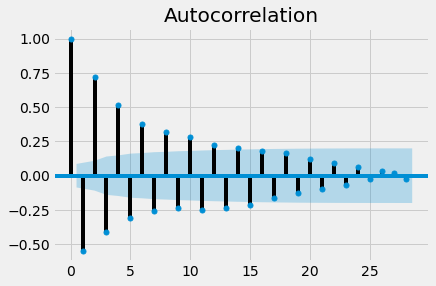

In [ ]:
plot_acf(serie2.value.diff().dropna()) # Se grafica la serie despues de tomar diferencias y eliminar los NA
plt.show()


Se evidencia en la ACF un decaimiento exponencial intercalado de signos. 


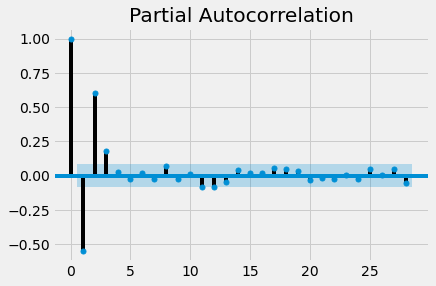

In [ ]:
plot_pacf(serie2.value.diff().dropna(), method="ywm")
plt.show()


La PACF que parece ser tipo corte en los lags 1 y 2. De manera menos significativa en el numero 3. Se podria observar un comportamiento sinoidal en la PACF. Basado en estos dos analisis, se proponen los siguientes modelos. 

In [ ]:
# Modelos propuestos
modelo1 = ARIMA(serie2.value, order=(3,1,0)).fit() 
modelo2 = ARIMA(serie2.value, order=(2,1,0)).fit()
modelo3 = ARIMA(serie2.value, order=(2,1,1)).fit()
modelo4 = ARIMA(serie2.value, order=(1,1,1)).fit()


* Modelo 1: AR(3)
* Modelo 2: AR(2)
* Modelo 3: ARMA(2,1)
* Modelo 4: ARMA(1,1)

Tenga presente que todos los modelos son tomados sobre los datos dado una diferencia. Es decir , d=1.

Ahora, para seleccionar los modelos y analogo a lo realizado en el inciso anterior, se procede a analizar el AIC y el BIC de los modelos. 

In [ ]:
print(modelo1.aic, modelo2.aic, modelo3.aic, modelo4.aic)
print(modelo1.bic, modelo2.bic, modelo3.bic, modelo4.bic)

1469.4503753935314 1486.4073384349326 1469.1547766297601 1618.5437235000454
1486.4656906398334 1499.1688248696591 1486.170091876062 1631.305209934772


Lo anterior, son los AIC (primera fila) y los BIC (segunda fila) de los respectivos modelos (del 1 al 4). Para ambos criterios, se selecciona el modelo con menor valor. Basado en esto, se selecciona el modelo 3, siendo estos muy similares con el modelo 1 puesto que es el que tiene menor AIC y menor BIC. Para dicho modelo, se deben de validar los supuestos. 

# Validacion de supuesos del modelo

In [ ]:
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  521
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -730.577
Date:                Wed, 05 Oct 2022   AIC                           1469.155
Time:                        02:37:53   BIC                           1486.170
Sample:                             0   HQIC                          1475.820
                                - 521                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0246      0.046     -0.533      0.594      -0.115       0.066
ar.L2          0.7135      0.034     21.124      0.000       0.647       0.780
ma.L1         -0.2924      0.068     -4.284      0.000      -0.426      -0.159
sigma2         0.9698      0.054     17.875      0.000       0.863       1.076
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 7.23
Prob(Q):                              0.77   Prob(JB):                         0.03
Heteroskedasticity (H):               0.97   Skew:                            -0.17
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

En las pruebas de correlacion de los residuales, no se rechazan la hipotesis nula y se concluye que los residuales son incorrelacionados (para un rezago de orden 1). Sin embargo, los residuales no distribuyen normales dado la prueba de normalidad de Jarque-Bera y su valor p (0.03).



In [ ]:
# prueba de circulo unitario (Estacionariedad)
#p = [-0.7135,0.0246,1]
a=np.roots([-0.7135,0.0246,1])
print(abs(a)) 

[1.20123173 1.16675381]


Dado que las raices se cneutran fuera del circulo unitario, el modelo es estacionaro. ¿Es invertible?

In [ ]:
# prueba de invertibilidad
#p = [-0.2924,1]
a=np.roots([-0.2924,1])
print(abs(a)) 

[3.41997264]


Dado este escenario, la matriz es invertible.

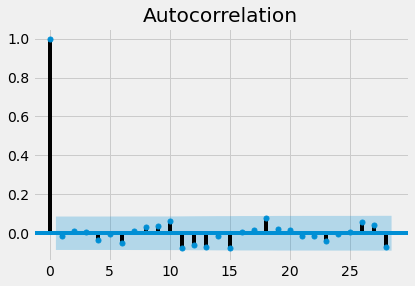

In [ ]:
plot_acf(modelo3.resid)
plt.show()


Ahora, se desea analizar con el grafico anterior autocorrelacion de los residuales con k rezagos en el pasado. Notese que no hay barras fueras de las bandas. En consecuencia, se concluye que no hay correlacion en los residuales.

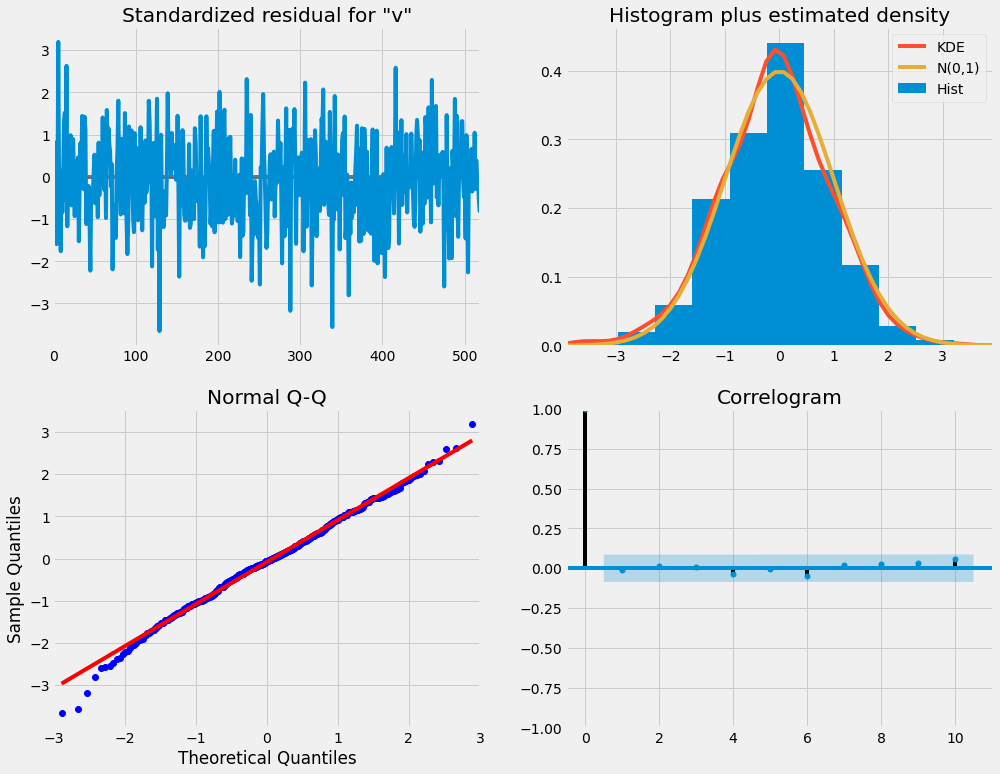

In [ ]:
modelo3.plot_diagnostics(figsize=(15,12))
plt.show()


De manera grafica y analitica, el modelo 3 cumple los supuestos de media y varianza constante, de incorrelacion en los residuales. 
De manera grafica, se ve que los residuales no se desvian en gran medida del QQ-Plot. Notese que aunque la prueba analitica rechaza normalidad, no es tan fuerte la desviacion, solo en los primeros datos. En consecuencia, a pesar de que los residuales no distribuyen normales, se continua con el modelo.

Con esto, se procede a realizar 5 predicciones con el modelo seleccionado.

# Prediccion con el modelo


In [ ]:
pred = modelo3.get_prediction(start=521, end=525, dynamic=False) 
pred_ci = pred.conf_int(alpha=0.05) # Intervalo de confianza 
pred_ci

,lower value,upper value
521,-95.917309,-92.057048
522,-97.244069,-92.569175
523,-98.282852,-91.124458
524,-99.586932,-91.142329
525,-100.528599,-89.878566


Lo anterior, son los intervalos de confianza para 5 predicciones realizadas con el modelo.

In [ ]:
pred.predicted_mean

521   -93.987178
522   -94.906622
523   -94.703655
524   -95.364630
525   -95.203583
Name: predicted_mean, dtype: float64

Obtenemos las predicciones promediando los intervalos de confianza obtenidos anteriormente. Las predicciones parecen tener tendencia bajista.

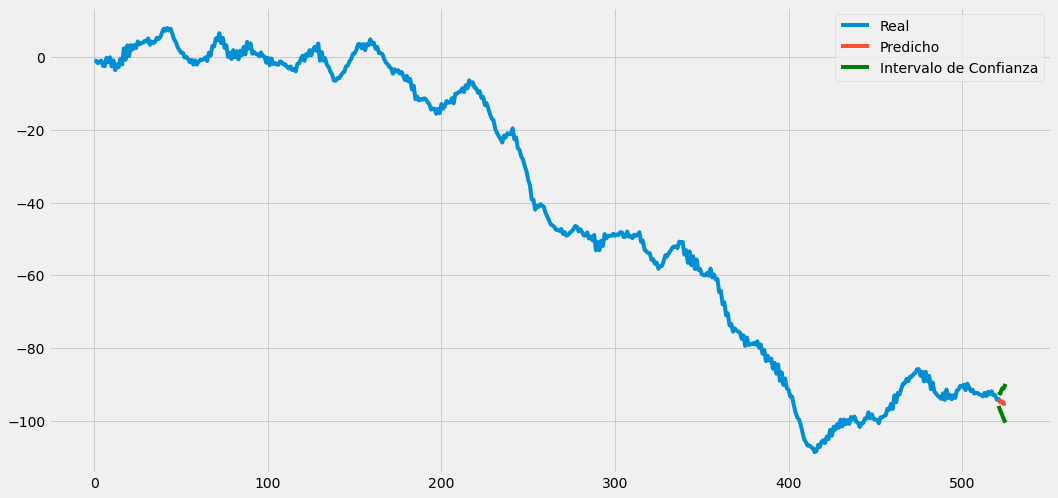

In [ ]:
# Grafica
plt.figure(figsize=(16,8)) 
serie2.value.append(pred.predicted_mean).plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

Analogamente a los resultados anteriores, se tiene las predicciones con sus respectivos intervalos de confianza. Note que, como es de esperar; para un t mayor, los intervalos de confianza se hacen más amplios, por tanto las predicciones pierden precision. 

# punto 3

In [ ]:
# Serie 3
serie3 = pd.read_excel("/content/datos_parcial2.xlsx", sheet_name="tercera", parse_dates=["dia"]) 
serie3.shape


(837, 2)

In [ ]:
serie3.dtypes

dia         datetime64[ns]
registro           float64
dtype: object

In [ ]:
serie3.head()


,dia,registro
0,2020-03-07,-54.21
1,2019-07-24,26.12
2,2020-07-10,-16.74
3,2019-06-19,-1.54
4,2019-04-01,-1.67


In [ ]:
serie3.tail()


,dia,registro
832,2019-02-17,0.35
833,2019-04-17,-13.90
834,2021-04-14,-52.95
835,2019-03-25,-12.94
836,2019-08-19,42.46


In [ ]:
serie3 = serie3.sort_values(by = "dia")

serie3.head()


,dia,registro
484,2019-01-01,1.37
661,2019-01-02,3.65
753,2019-01-03,5.86
211,2019-01-04,10.57
441,2019-01-05,14.17


In [ ]:
serie3.tail()


,dia,registro
121,2021-04-12,-59.77
626,2021-04-13,-56.04
834,2021-04-14,-52.95
156,2021-04-15,-52.33
220,2021-04-16,-53.02


In [ ]:
serie3 = serie3.reset_index()
serie3= serie3.drop(['index'],axis = 1)


In [ ]:
serie3.head()


,dia,registro
0,2019-01-01,1.37
1,2019-01-02,3.65
2,2019-01-03,5.86
3,2019-01-04,10.57
4,2019-01-05,14.17


In [ ]:
serie3.tail()

,dia,registro
832,2021-04-12,-59.77
833,2021-04-13,-56.04
834,2021-04-14,-52.95
835,2021-04-15,-52.33
836,2021-04-16,-53.02


Se debe entonces de organizar la serie por fechas.

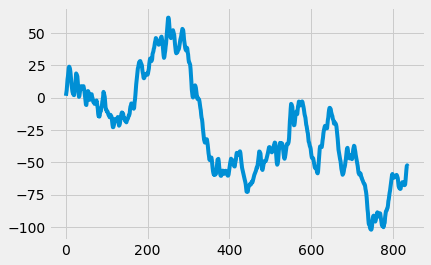

In [ ]:
serie3.registro.plot()

Dado los datos, se ve una tendencia en la serie. Dicha tendencia es decreciente y en consecuencia, se espera no se cumpla el supuesto de estacionariedad. Parecen haber ciclos decrecientes. 

# Calculo de ACF y PACF


In [ ]:
acf(serie3.registro, nlags=10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([1.        , 0.99799261, 0.99380988, 0.98806817, 0.98112657,
       0.97382558, 0.96660553, 0.95949007, 0.95250144, 0.94559652,
       0.93875801])

In [ ]:
pacf(serie3.registro, method='ywm', nlags=10)

array([ 1.        ,  0.99799261, -0.54338252, -0.13794363, -0.06820711,
        0.17391902,  0.08514811, -0.04094954, -0.052545  , -0.02638892,
        0.02920303])

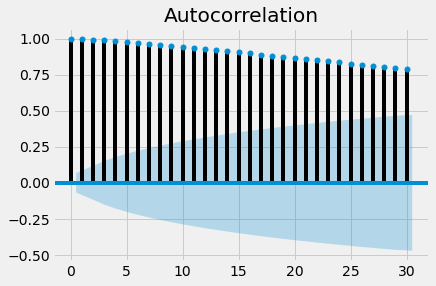

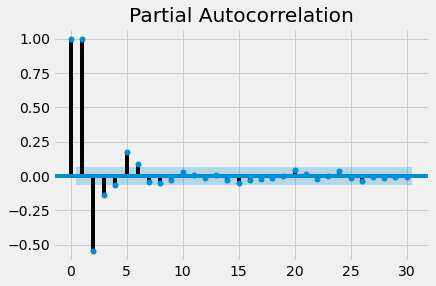

In [ ]:
plot_acf(serie3.registro)
plt.show()
plot_pacf(serie3.registro, method='ywm')
plt.show()

Como la ACF decae muy lentamente, se tiene un problema con la tendencia. Esto ha de ser corregido, tomando diferencias. Pero antes, es necesario calcular el test de DF para en efecto, probar de manera analitica esta "sospecha".

In [ ]:
adfuller(serie3.registro)[1] # Valor p de la prueba.


0.5213338273526291

El valor p asociado a esta prueba es grande. Esto implica que la serie no es estacionaria. Para esto entonces, es necesario tomar diferencias y, analizar su comportamiento.

In [ ]:
adfuller(serie3.registro.diff().dropna()) # Se toma diferencia, se eliminan los na y se realiza la prueba

(-6.0876204755562435,
 1.0550731533337972e-07,
 18,
 817,
 {'1%': -3.438379332805805,
  '5%': -2.865084115496387,
  '10%': -2.5686571948451586},
 2348.977389255808)

Despues de tomar diferencias, se tiene que el modelo es ahora estacionario. Dado este caso, los modelos utilizados han de tomar un d=1 (diferencias).
Se procede a graficas la ACF y PACF de las diferencias.



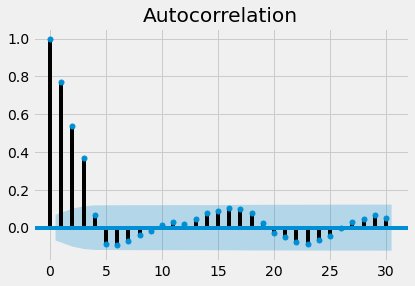

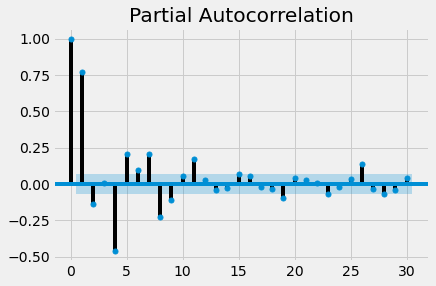

In [ ]:
plot_acf(serie3.registro.diff().dropna())
plt.show()
plot_pacf(serie3.registro.diff().dropna())
plt.show()


Tanto la ACF como la PACF en principio parecen tener un comportamiento senoidal. Tambien podria interpretarse como senoidal para la ACF y corte parala PACF. Dada esta ambiguedad, se proponen varios modelos.

In [ ]:
modelo1 = ARIMA(serie3.registro, order=(1,1,1)).fit()
modelo2 = ARIMA(serie3.registro, order=(1,1,0)).fit()
modelo3 = ARIMA(serie3.registro, order=(0,1,1)).fit()
modelo4 = ARIMA(serie3.registro, order=(2,1,1)).fit()
modelo5 = ARIMA(serie3.registro, order=(1,1,2)).fit()
modelo6 = ARIMA(serie3.registro, order=(2,1,2)).fit()
modelo7 = ARIMA(serie3.registro, order=(2,1,1)).fit()
modelo8 = ARIMA(serie3.registro, order=(3,1,1)).fit()
modelo9 = ARIMA(serie3.registro, order=(1,1,3)).fit()
modelo10= ARIMA(serie3.registro, order=(3,1,3)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
a= (modelo1.aic, modelo2.aic, modelo3.aic, modelo4.aic, modelo5.aic, modelo6.aic, modelo7.aic, modelo8.aic, modelo9.aic, modelo10.aic)
a=list(a)
b= (modelo1.bic, modelo2.bic, modelo3.bic, modelo4.bic, modelo5.bic, modelo6.bic, modelo7.bic, modelo8.bic, modelo9.bic, modelo10.bic)
b=list(b)
aic = min(a)
bic = min(b)
print("AIC del modelo es:", a.index(aic)+1)
print("BIC del modelo es:", b.index(bic)+1)

AIC del modelo es: 10
BIC del modelo es: 10


Lo anterior es el AIC y el BIC de los modelos. Se selecciona automaticamente el AIC y el BIC menor. Esto se seleccionó basado en la tabla de resultados siguiente


In [ ]:
print(a) # AIC
print(b) # BIC



[2747.6531235771363, 2778.395176472751, 2860.165758624968, 2669.8075653282463, 2702.059951915454, 2668.2044489539303, 2669.8075653282463, 2661.027324983465, 2422.8065911596345, 2382.4215510770523]
[2761.8390094163906, 2787.8524336989203, 2869.6230158511376, 2688.722079780585, 2720.9744663677925, 2691.8475920193537, 2688.722079780585, 2684.6704680488883, 2446.449734225058, 2415.521951368645]


Note que el menor valor es el del modelo 10 (Ultimo). Recuerde que el orden es de izquierda a derecha, el modelo 1 al i-esimo modelo.

Arriba se presenta el AIC, abajo, BIC. Nuevamente, se selecciona el modelo 10.

# Validacion de supuestos


In [ ]:
modelo10.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               registro   No. Observations:                  837
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1184.211
Date:                Wed, 05 Oct 2022   AIC                           2382.422
Time:                        02:37:57   BIC                           2415.522
Sample:                             0   HQIC                          2395.111
                                - 837                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6222      0.044     14.230      0.000       0.537       0.708
ar.L2         -0.3203      0.053     -6.012      0.000      -0.425      -0.216
ar.L3          0.1315      0.042      3.136      0.002       0.049       0.214
ma.L1          0.2940      0.027     10.817      0.000       0.241       0.347
ma.L2          0.5210      0.020     26.536      0.000       0.482       0.559
ma.L3          0.8009      0.026     30.999      0.000       0.750       0.852
sigma2         0.9886      0.046     21.703      0.000       0.899       1.078
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 7.39
Prob(Q):                              0.71   Prob(JB):                         0.02
Heteroskedasticity (H):               0.85   Skew:                             0.15
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

De la tabla resumen del modelo seleccionado, se tiene que los residuales no distribuyen normal y su correlacion de lag 1 es cero. 

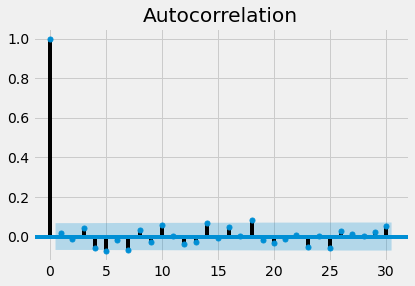

In [ ]:
plot_acf(modelo10.resid) 
plt.show()

Para analizar la correlacion de los residuales, se tiene la funcion de autocorrelacion para los residuales. Al parecer, hay correlacion con algunos lags. Graficamente no es facil decidir. Se analizan los p valores en la siguiente tabla para los primeros 10 lags.

In [ ]:
sm.stats.acorr_ljungbox(modelo10.resid, lags=10, return_df=True)



,lb_stat,lb_pvalue
1,0.272511,0.601652
2,0.435407,0.804364
3,2.071738,0.557652
4,5.086451,0.278542
5,9.403532,0.094011
6,9.612193,0.141962
7,13.687090,0.057035
8,14.723585,0.064748
9,15.427410,0.079845
10,18.511661,0.046922


Despues de analizar los anteriores valores p, se concluye que existen algunas correlaciones entre los residuales dados algunos lags.
El modelo no tendrá inconvenientes siempre y cuando se trabajen con largs <=9. Esto es dado que, para un lag de 10, se tiene que hay correlacion. Esto es algo a tener presente a la hora de realizar predicciones.


In [ ]:
# prueba de circulo unitario (Estacionariedad)
#p = [-0.1315,0.3203,-0.622,1]
a=np.roots([-0.1315,0.3203,-0.622,1])
print(abs(a))

[1.98375808 1.9579102  1.9579102 ]


Dado que las raices del polinomio son mayores a cero, se concluye que es estacionario. 

In [ ]:
# prueba de invertibilidad
#p = [0.8009,0.5210,0.294,1]
a=np.roots([0.8009,0.5210,0.294,1])
print(abs(a))

[1.20535925 1.01777692 1.01777692]


Como las raices son mayores a 1, se concluye que la matriz es invertible.

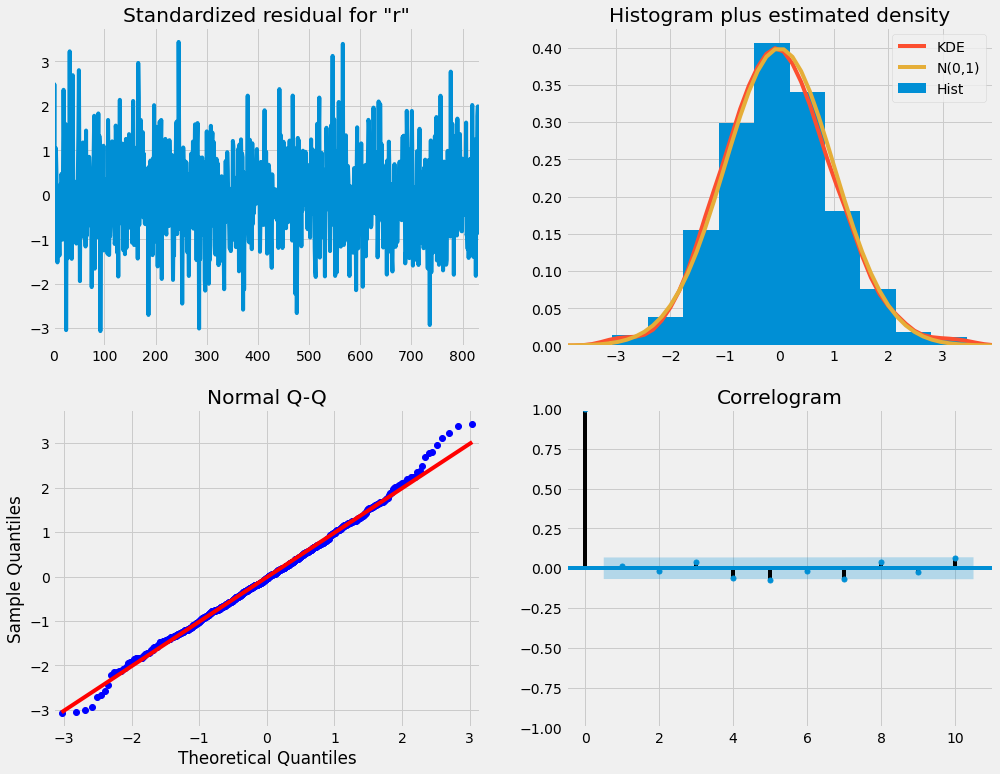

In [ ]:
modelo10.plot_diagnostics(figsize=(15,12))
plt.show()


Respecto a el supuesto de media y varianza constante, no hay evidencia para sospechar que no se cumpla. Los residuales parecen distribuir normales aunque la prueba analitica de Jarque-Bera rechaza normalidad. La correlacion se ve algo comprometida pero se procede con este modelo dado que la desviacion de normalidad en principio, no parece grave.

# Prediccion del modelo

Basado en este modelo, se procede a realizar cinco predicciones con el mismo.

In [ ]:

pred = modelo10.get_prediction(start=837, end=841, dynamic=False) 
pred_ci = pred.conf_int(alpha=0.05) # Intervalo de confianza 
pred_ci # Estos son los intervalos de confianza para las predicciones

,lower registro,upper registro
837,-55.591817,-51.694380
838,-58.537301,-50.113000
839,-61.217188,-47.776779
840,-64.475274,-44.459429
841,-67.630797,-41.336297


In [ ]:
fore = modelo10.get_forecast(5)
fore.predicted_mean

fore_ci = fore.conf_int()
fore_ci # hay leves diferencias

,lower registro,upper registro
837,-55.591817,-51.694380
838,-58.537301,-50.113000
839,-61.217188,-47.776779
840,-64.475274,-44.459429
841,-67.630797,-41.336297


In [ ]:
# Las respectivas predicciones
pred.predicted_mean

837   -53.643098
838   -54.325151
839   -54.496983
840   -54.467351
841   -54.483547
Name: predicted_mean, dtype: float64

Note que las predicciones la gran mayoria toma valores que van a la baja a exepcion de la tercer prediccion.

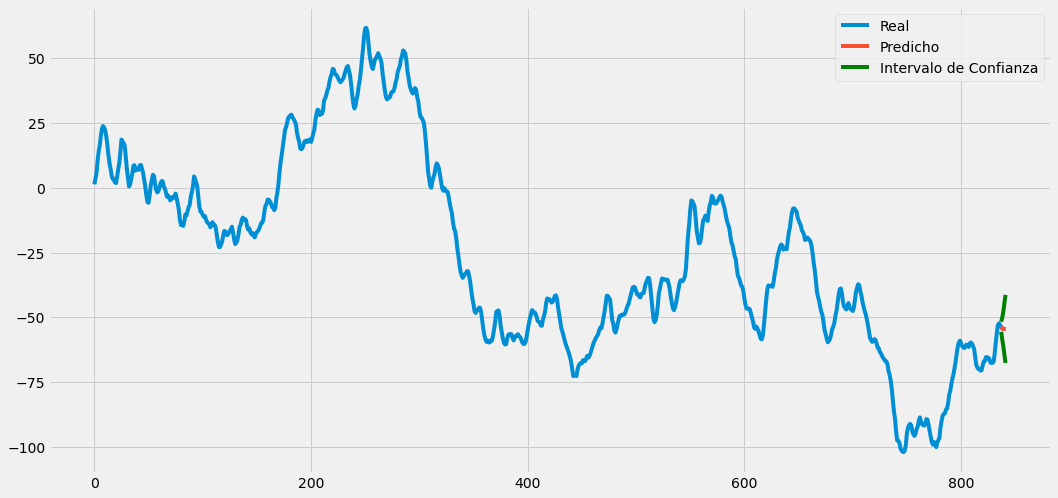

In [ ]:
# Grafica predicciones
plt.figure(figsize=(16,8)) 
serie3.registro.append(pred.predicted_mean).plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])





Como es de esperarse y al igual que todos los analisis anteriores, los intervalos de confianza se hacen mas grandes en la medida que se predicen mas observaciones. Esto, dado que; a medida que t se hace mas grande, la prediccion se hace mas imprecisa. 

Algo destacable de este grafico es que, dado a que se tienen muchos datos (más de 800), predecir solo 5 observaciones no permite verlas de manera grafica. Por esto, se propone un grafico parcial, teniendo en cuenta que ya se observó a la serie completa.



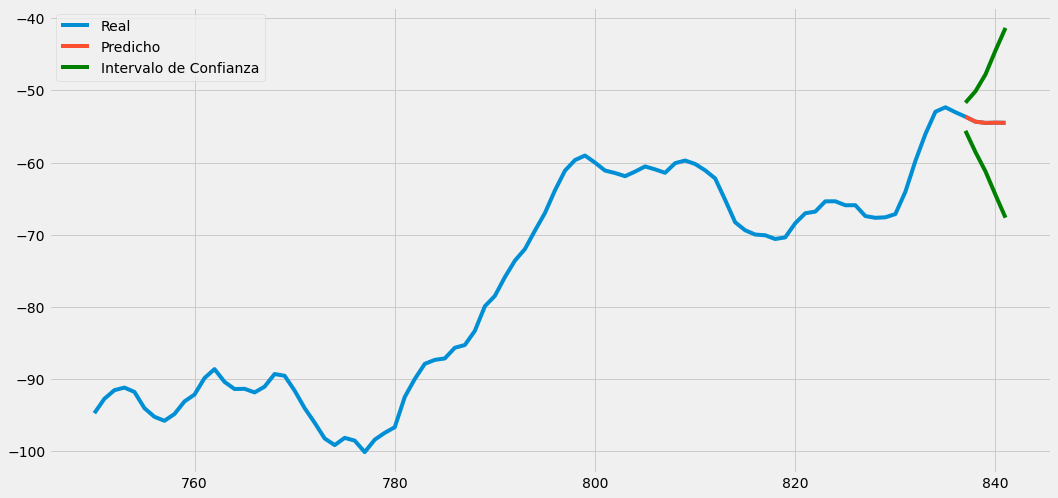

In [ ]:
# Grafica predicciones
plt.figure(figsize=(16,8)) 
z=serie3.registro.append(pred.predicted_mean)
z[750:len(z)].plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])


Finalmente, al realizar una mejor observacion a una porcion de la serie se observa que a medida que avanza el tiempo t, los intervalos de confianza asociados a las predicciones se hacen mas grandes. Igual que los analisis ateriores, esto afecta la precision de la predicion.